<center>
    <img src="https://drive.google.com/uc?export=view&id=1hDKusF04c0lNZA_qOShvWQrpImayVKz8"  width="1000" />
</center>

# Hands-On
---
Hands-On ini digunakan pada kegiatan Kursus Data Science yang merupakan pembekalan bagi mahasiswa Universitas Gunadarma untuk Skema Associate Data Scientist

### Pertemuan 4 - Semester 7

### Daftar Isi :
Membangun Model dan Mengevaluasi Hasil Pemodelan
- Supervised Learning
    - Klasifikasi
    1. Menggunakan machine learning
    2. Menggunakan deep learning

- Unsupervised Learning

### Supervised Learning dan Unsupervised Learning

<center>
    <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/0*H4D11uM2V6wcgK4k.png"  width="300" />
    <figcaption>Ilustrasi Supervised dan Unsupervised Learning</figcaption>
</center>

### Supervised Learning
Supervised learning adalah jenis pembelajaran mesin di mana algoritma diajari menggunakan data yang sudah diberi label. Dalam supervised learning, ada variabel target (variabel dependen) yang ingin diprediksi, dan algoritma dilatih untuk menghubungkan fitur atau atribut yang ada dalam data dengan target yang telah diberikan (variabel independen).

Supervised learning biasanya digunakan untuk dua hal utama :
- Classification
- Regression

Beberapa algoritma supervised learning :
1. Linear Regression
2. Logistic Regression
3. K-Nearest Neighbours
4. Decision Trees
5. SVM
6. Naive Bayes
7. Neural Networks

### Unsupervised Learning
Unsupervised learning adalah jenis pembelajaran mesin di mana algoritma dilatih dari data yang tidak memiliki label atau target yang jelas. Dalam unsupervised learning, tujuannya adalah menemukan pola, struktur, dan hubungan tersembunyi dalam data tanpa arahan yang eksplisit.

Umumnya unsupervised learning digunakan untuk tiga hal utama:
- Clustering
- Association
- Dimensionality reduction

Salah satu contoh unsupervised Learning algorithms :
1. K-Means

### 3. Membangun Model Unsupervised Learning dan Mengevaluasi Hasil Pemodelan (K-Means)

---

In [1]:
# Import library
import pandas as pd
from sklearn.cluster import KMeans
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# Memuat Data
df = pd.read_csv('delay_maskapai_unsupervised.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10787 entries, 0 to 10786
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Flight       10787 non-null  float64
 1   Time         10787 non-null  float64
 2   Length       10787 non-null  float64
 3   Airline      10787 non-null  object 
 4   AirportFrom  10787 non-null  object 
 5   AirportTo    10787 non-null  object 
 6   DayOfWeek    10787 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 590.0+ KB


In [4]:
df.drop(['Flight'],axis=1,inplace=True)

Text(0, 0.5, 'Time')

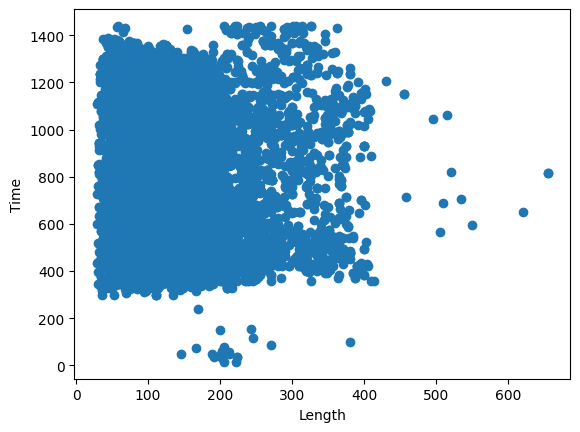

In [5]:
# Eksplorasi Data
plt.scatter(df["Length"],
            df["Time"])

plt.xlabel("Length")
plt.ylabel("Time")

Pada scatterplot di atas dapat dilihat bahwa cluster dari data masih belum terlihat jelas. Maka dari itu, K-Means disini berfungsi untuk menentukan cluster secara efisien

In [6]:
# Scaling
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
df[['Time','Length']] = scaler.fit_transform(df[['Time','Length']])
scaled_data = df[['Time','Length']]

scaled_data.head()

,Time,Length
0,0.241211,0.651624
1,-1.582136,-0.940654
2,-0.228166,1.727109
3,-0.751701,1.419828
4,-0.986389,-0.004841


In [8]:
def find_best_clusters(df, maximum_K):

    clusters_centers = []
    k_values = []

    for k in range(1, maximum_K):

        kmeans_model = KMeans(n_clusters = k, random_state=42, n_init='auto',max_iter=300)
        kmeans_model.fit(df)

        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)


    return clusters_centers, k_values

Fungsi di atas digunakan untuk mencari jumlah cluster yang optimal dalam rentang nilai K tertentu. Fungsi mengambil dua argumen: df yang merupakan dataframe yang berisi data yang akan digunakan untuk clustering, dan maximum_K yang merupakan nilai maksimum untuk jumlah cluster yang akan dievaluasi.

- Dalam setiap iterasi loop, fungsi membuat objek KMeans dengan jumlah cluster yang berbeda, mulai dari 1 hingga maximum_K - 1.
- Model KMeans kemudian dilatih menggunakan data df.
- Setelah pelatihan, nilai inersia dari setiap model KMeans, yaitu jumlah jarak kuadrat antara titik data dengan pusat cluster terdekat, disimpan dalam daftar clusters_centers.
- Jumlah cluster yang digunakan untuk model KMeans disimpan dalam daftar k_values.
- Fungsi mengembalikan dua daftar, yaitu clusters_centers dan k_values.
- generate_elbow_plot(clusters_centers, k_values): Fungsi ini digunakan untuk menghasilkan elbow plot berdasarkan daftar nilai inersia dan jumlah cluster yang diperoleh dari fungsi sebelumnya. Fungsi mengambil dua argumen: clusters_centers yang berisi daftar nilai inersia, dan k_values yang berisi daftar jumlah cluster.

In [9]:
def generate_elbow_plot(clusters_centers, k_values):

    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

Fungsi di atas menghasilkan elbow plot berdasarkan daftar nilai inersia dan jumlah cluster yang diperoleh dari fungsi sebelumnya. Fungsi mengambil dua argumen: clusters_centers yang berisi daftar nilai inersia, dan k_values yang berisi daftar jumlah cluster.

- Fungsi menghasilkan sebuah plot dengan menggunakan plt.subplots dengan ukuran gambar (figsize) yang ditentukan.
- Plot menampilkan garis yang menghubungkan setiap nilai inersia dengan jumlah cluster yang sesuai, menggunakan plt.plot.
- Label sumbu x ditetapkan sebagai "Number of Clusters (K)" menggunakan plt.xlabel.
- Label sumbu y ditetapkan sebagai "Cluster Inertia" menggunakan plt.ylabel.
- Judul plot ditetapkan sebagai "Elbow Plot of KMeans" menggunakan plt.title.
- Akhirnya, plot ditampilkan menggunakan plt.show().

Cluster inertia adalah ukuran yang digunakan untuk menggambarkan seberapa rapat atau terkonsentrasi titik data dalam setiap cluster pada algoritma clustering, seperti KMeans.

Cluster inertia menggambarkan jumlah jarak kuadrat antara setiap titik data dengan pusat cluster terdekatnya. Secara intuitif, Cluster inertia mengukur seberapa jauh titik data dalam satu cluster cenderung berada dari pusatnya. Semakin kecil Cluster inertia, semakin rapat atau terkonsentrasi titik data dalam setiap cluster, yang mengindikasikan kualitas yang lebih baik dari hasil clustering.

In [10]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

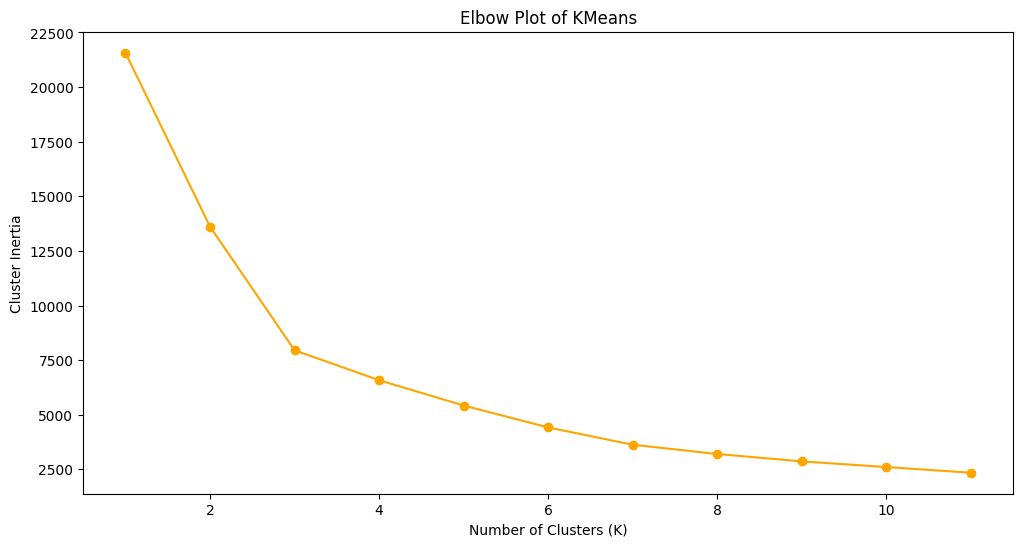

In [11]:
generate_elbow_plot(clusters_centers, k_values)

<center>
    <img src="https://drive.google.com/uc?export=view&id=1m1UEQRx-a-r2S4jrHkz31lFqCdoiFZcW"  width="1000" />
</center>

Dari plot, kita dapat melihat bahwa inersia cluster menurun saat jumlah cluster meningkat. Selain itu, penurunan inersia menjadi minimal setelah K=7, sehingga 7 dapat dianggap sebagai jumlah cluster yang optimal.

In [12]:
# Melakukan clustering dengan k = 7
kmeans_model = KMeans(n_clusters = 7,random_state=42, n_init='auto',max_iter=300)

kmeans_model.fit(scaled_data)

KMeans(n_clusters=7, n_init='auto', random_state=42)

In [13]:
# Membuat kolom baru dengan data dari hasil clustering oleh K-Means
df['Cluster Label'] = kmeans_model.labels_

In [14]:
df.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Cluster Label
0,0.241211,0.651624,CO,IAH,PHX,5,5
1,-1.582136,-0.940654,OO,DSM,MKE,2,6
2,-0.228166,1.727109,DL,SEA,CVG,7,3
3,-0.751701,1.419828,WN,SNA,MDW,7,0
4,-0.986389,-0.004841,CO,IAH,MCO,6,6


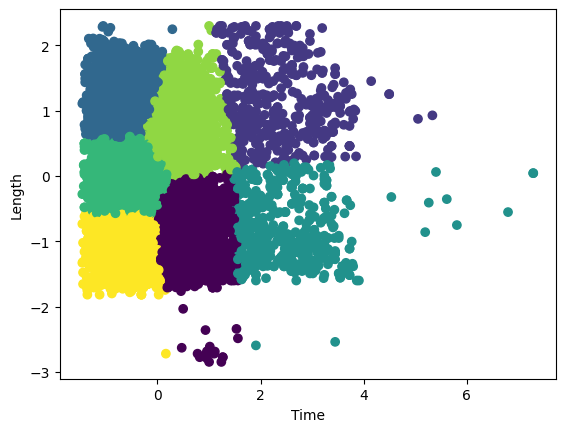

In [15]:
# Melihat hasil cluster K-Means dengan scatter plot
plt.scatter(df["Length"],
            df["Time"],
            c = df["Cluster Label"])

plt.xlabel("Time")
plt.ylabel("Length")
plt.show()